# Optimal K value for K-Means clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Customers.csv")

In [3]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
X = dataset.iloc[:,3:5].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# ELBOW METHOD

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,15):
    model = KMeans(n_clusters = i, init = 'k-means++',random_state = 0).fit(X)
    wcss.append(model.inertia_)
      

C:\Users\tom97\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413,
 17702.59593229628,
 15810.838613705504,
 14763.33040255821,
 13165.329070181635]

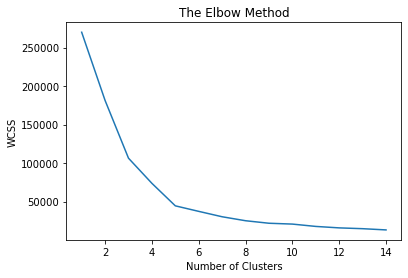

In [26]:
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

# SILHOUETTE METHOD

In [27]:
from sklearn.metrics import silhouette_score


sil = []

for k in range(2, 15):
  model = KMeans(n_clusters = k).fit(X)
  labels = model.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

In [28]:
sil

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5270287298101395,
 0.4583576977507227,
 0.4565077334305076,
 0.4509237544334418,
 0.44971596383828893,
 0.43002760413978436,
 0.41836631620267306,
 0.42154870471557193]

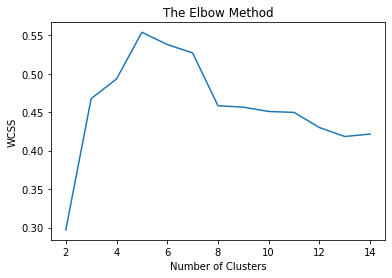

In [30]:
plt.plot(range(2,15),sil)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

# MODEL BUILDING

In [31]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [35]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [37]:
X[y_kmeans]

array([[17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [16, 77],
       [17, 40],
       [15, 81],
       [17, 40],
       [16, 77],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81],
       [15, 81

In [45]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

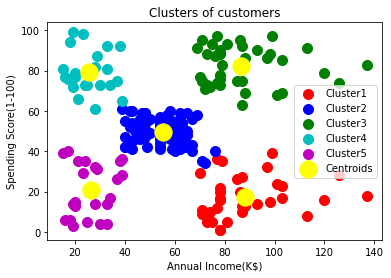

In [44]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='r',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='b',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='g',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='c',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='m',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()